In [1]:
import os
import sys
from collections import Counter, defaultdict

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!mkdir ./dcm_scratch
!rm ./dcm_scratch/*
!cp /mnt/ml4cvd/projects/bulk/brain_mri/1000503_20216_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000503_20216_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory './dcm_scratch': File exists
Archive:  ./dcm_scratch/1000503_20216_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374756302355469.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374757388855477.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374164178154740.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374138653254700.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937413607754649.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374047289354571.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374695912055403.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937457132155202.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374397582555051.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937433003554926.dcm  
  inflating: ./dcm_scratch/

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937423080854787.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374188280854766.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374039579954564.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374674970055388.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937466820555331.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374533218355233.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374440455655114.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374437852455111.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374343632254968.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374295478254912.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374261685054866.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374618708855342.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374640501255359.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374550876255262.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374533898455235.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374389411655034.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374319823654945.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374077568954614.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937474927955414.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937464926955327.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374289338354899.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374270307454879.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374573845255282.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374482323655168.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374437571255110.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374359993555001.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374341322954964.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374327655254954.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374259987954862.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374224586154816.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374130270854685.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374059699054589.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374026872054540.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.

In [6]:
stats = Counter()
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    stats['count'] += 1
    stats[f'series_num_{dcm.SeriesNumber}'] += 1
    stats[f'instance_num_{dcm.SeriesDescription}'] += 1
    stats[f'Pixel spacing{dcm.PixelSpacing}'] += 1
    stats[f'Shape {dcm.pixel_array.shape}'] += 1

for k in stats:
    print(f'{k} has {stats[k]}')

count has 416
series_num_5 has 208
instance_num_T1_p2_1mm_fov256_sag_TI_880 has 416
Pixel spacing['1', '1'] has 416
Shape (256, 256) has 416
series_num_6 has 208


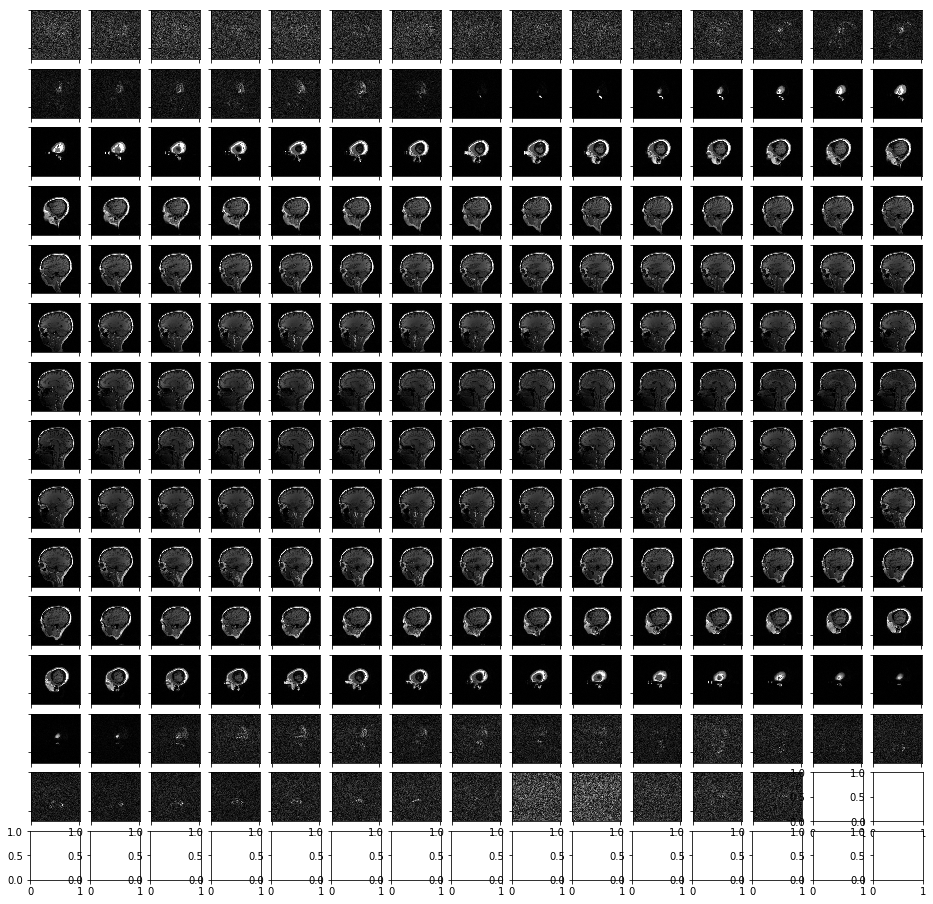

In [7]:
num_cols = num_rows = 15
_, axes = plt.subplots(num_cols, num_rows, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    if dcm.SeriesNumber in [6, 12]:
        continue
    ideal_index = int(dcm.InstanceNumber)-1
    axes[ideal_index//num_cols, ideal_index%num_cols].imshow(dcm.pixel_array, cmap='gray', vmin=np.min(dcm.pixel_array), vmax=np.max(dcm.pixel_array))
    axes[ideal_index//num_cols, ideal_index%num_cols].set_yticklabels([])
    axes[ideal_index//num_cols, ideal_index%num_cols].set_xticklabels([])

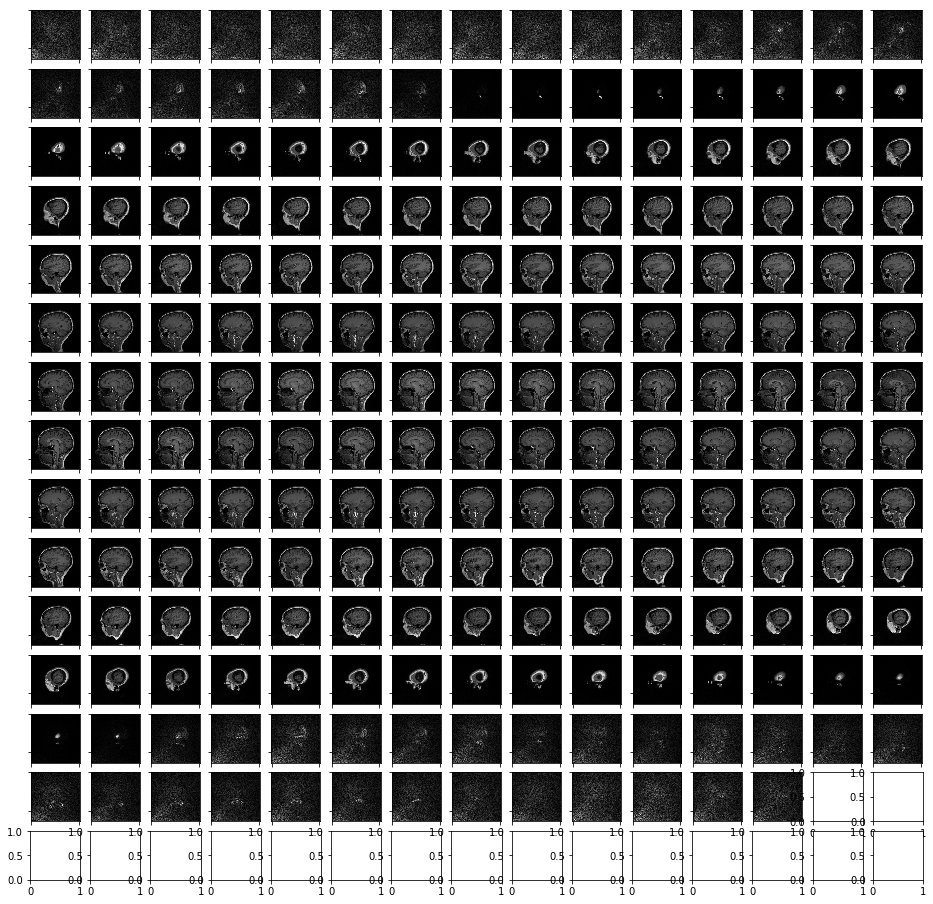

In [8]:
num_cols = num_rows = 15
_, axes = plt.subplots(num_cols, num_rows, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    if dcm.SeriesNumber in [5, 11]:
        continue
    ideal_index = int(dcm.InstanceNumber)-1
    axes[ideal_index//num_cols, ideal_index%num_cols].imshow(dcm.pixel_array, cmap='gray', vmin=np.min(dcm.pixel_array), vmax=np.max(dcm.pixel_array))
    axes[ideal_index//num_cols, ideal_index%num_cols].set_yticklabels([])
    axes[ideal_index//num_cols, ideal_index%num_cols].set_xticklabels([])